In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize']=(12,8)

In [3]:
data=pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
data.shape

(97, 2)

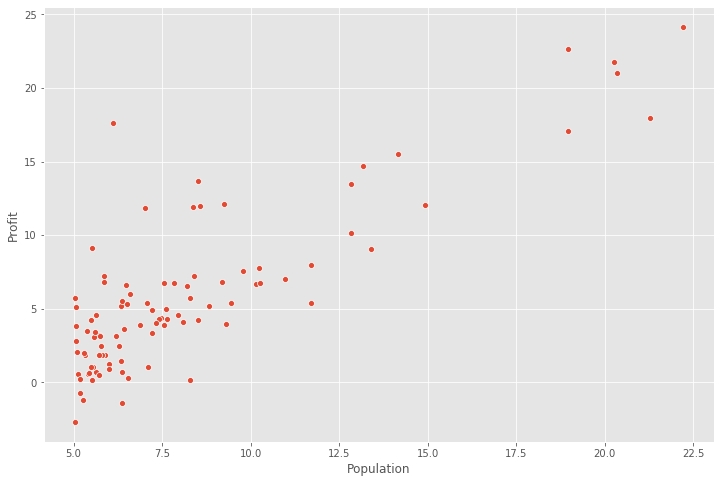

In [7]:
#Visualise the data
ax=sns.scatterplot(x="Population",y="Profit",data=data)

In [8]:
#Compute the Cost Function
def cost_function(X,y,theta):
    m=len(y)
    y_pred= X.dot(theta)
    error = (y_pred-y)**2
    
    return 1/(2*m) * np.sum(error)

In [9]:
m=data.Population.values.size
X=np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
y=data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(X,y,theta)

32.072733877455676

In [10]:
#Compute Gradient Descent
def gradient_descent(X,y,theta,alpha,iteration):
    m= len(y)
    costs = []
    for i in range(iteration):
        y_pred=X.dot(theta)
        error = np.dot(X.transpose(),(y_pred - y))
        theta-=alpha * 1/m *error
        costs.append(cost_function(X,y,theta))
        return theta,costs

In [11]:
theta,costs=gradient_descent(X,y, theta,alpha=0.01,iteration=2000)
print("h(x)={} + {}x1".format(str(round(theta[0,0],2)),str(round(theta[1,0],2))))

h(x)=0.06 + 0.65x1


In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
theta_0= np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)
cost_values= np.zeros((len(theta_0),len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        cost_values[i,j] = cost_function(X,y,t)

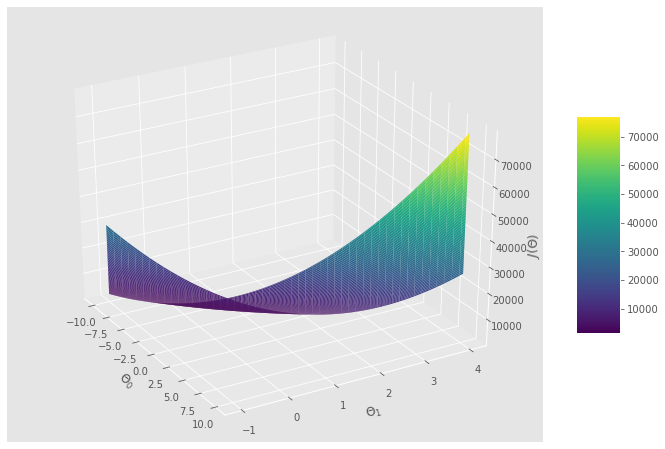

In [14]:
fig=plt.figure(figsize=(12,8))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(theta_0,theta_1,cost_values,cmap='viridis')
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)
plt.show()

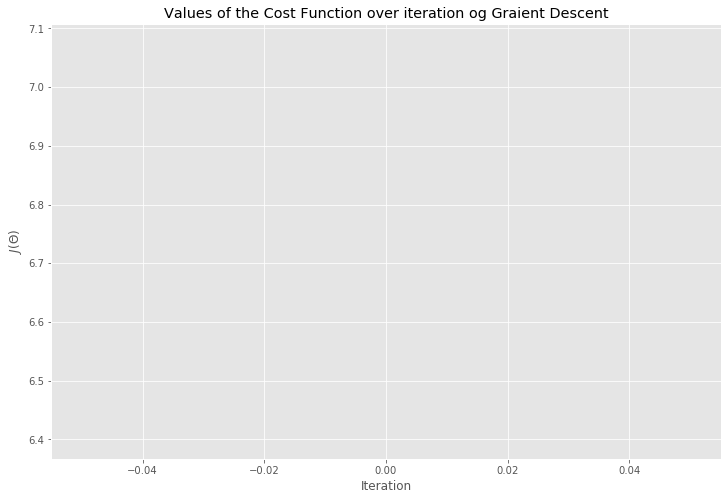

In [24]:
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over iteration og Graient Descent");

In [25]:
theta.shape

(2,)

In [26]:
theta

array([0.05839135, 0.6532885 ])

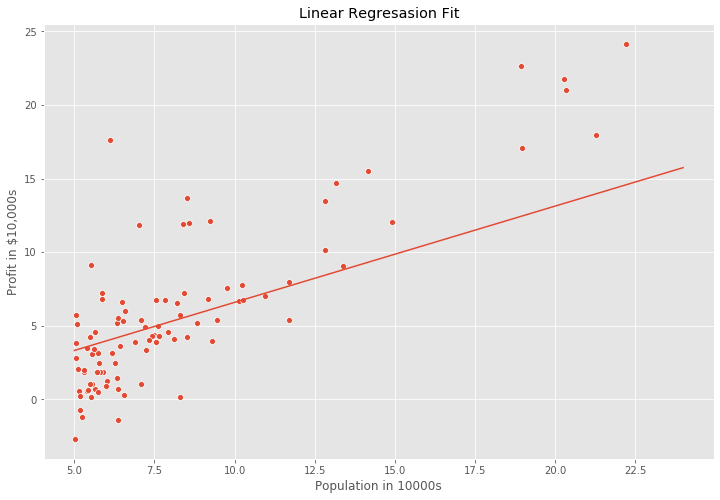

In [27]:
theta = np.squeeze(theta)
ax=sns.scatterplot(x="Population",y="Profit",data=data)

x_value = [x for x in range(5,25)]
y_value = [(x*theta[1]+ theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)


plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regresasion Fit");

In [28]:
#Interference using the optimized 0 values(h=0^T * x)
def predict(x,theta):
    y_pred= np.dot(theta.transpose(),x)
    return y_pred

In [29]:
y_pred_1 = predict(np.array([1,4]),theta) * 10000
print("For a Population of 40,000,the model predicts a profits of $"+str(round(y_pred_1)))

For a Population of 40,000,the model predicts a profits of $26715.0


In [30]:
y_pred_2 = predict(np.array([1,8.3]),theta) * 10000
print("For a Population of 40,000,the model predicts a profits of $"+str(round(y_pred_2)))

For a Population of 40,000,the model predicts a profits of $54807.0


In [ ]:
y_pred_1 = predict(np.array([1,4]),theta) * 10000
print("For a Population of 40,000,the model predicts a profits of $"+str(round(y_pred_1)))